# Индивидуальный проект
## Проблема
Неэффективное использование персоналом компании рабочего времени приводит к снижению результатов труда и сокращению выручки компании. Мерой абсентеизма чаще всего выступает общее количество пропущенных дней (или часов) или частота отсутствия сотрудника на работе. Коэффициент абсентеизма помогает проанализировать время, в течение которого сотрудники отсутствовали на работе или занимались личными делами. Чем он выше, тем больше времени работники тратят впустую. 

Цель исследования - определить, какой признак оказывает наиболее существенное влияние на намерение сотрудника отстствовать на работе.

Задачи исследования:
1. Проанализировать основные метрики
2. Проанализировать гистограммы
3. Удалить аномальные значения
4. Провести train и test
5. Обучить линейную регрессию
6. Проанализировать RMSE и R2.
7. Выявить наиболее влияющие факторы


## Общая информация о данных

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('MFGEmployees4.csv')
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


Как видно из представленной таблицы, мы имеем 13 столбцов, один из которых представляет уровень абсентеизма.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


Как видно из представленной информации, у нас в каждом столбце 8336 заполненных ячеек, а основным типом данных является объект (судя по таблице выше, в каждом таком столбце представлены текстовые значения).

## Анализ метрик и гистограмм

In [21]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


Как видно из представленной таблицы, у нас значение 50% часов абсетнеизма чуть ниже среднего значения. Также достаточно сильно возрасло максимальное значение по сравнению со значением 75% квантиля.

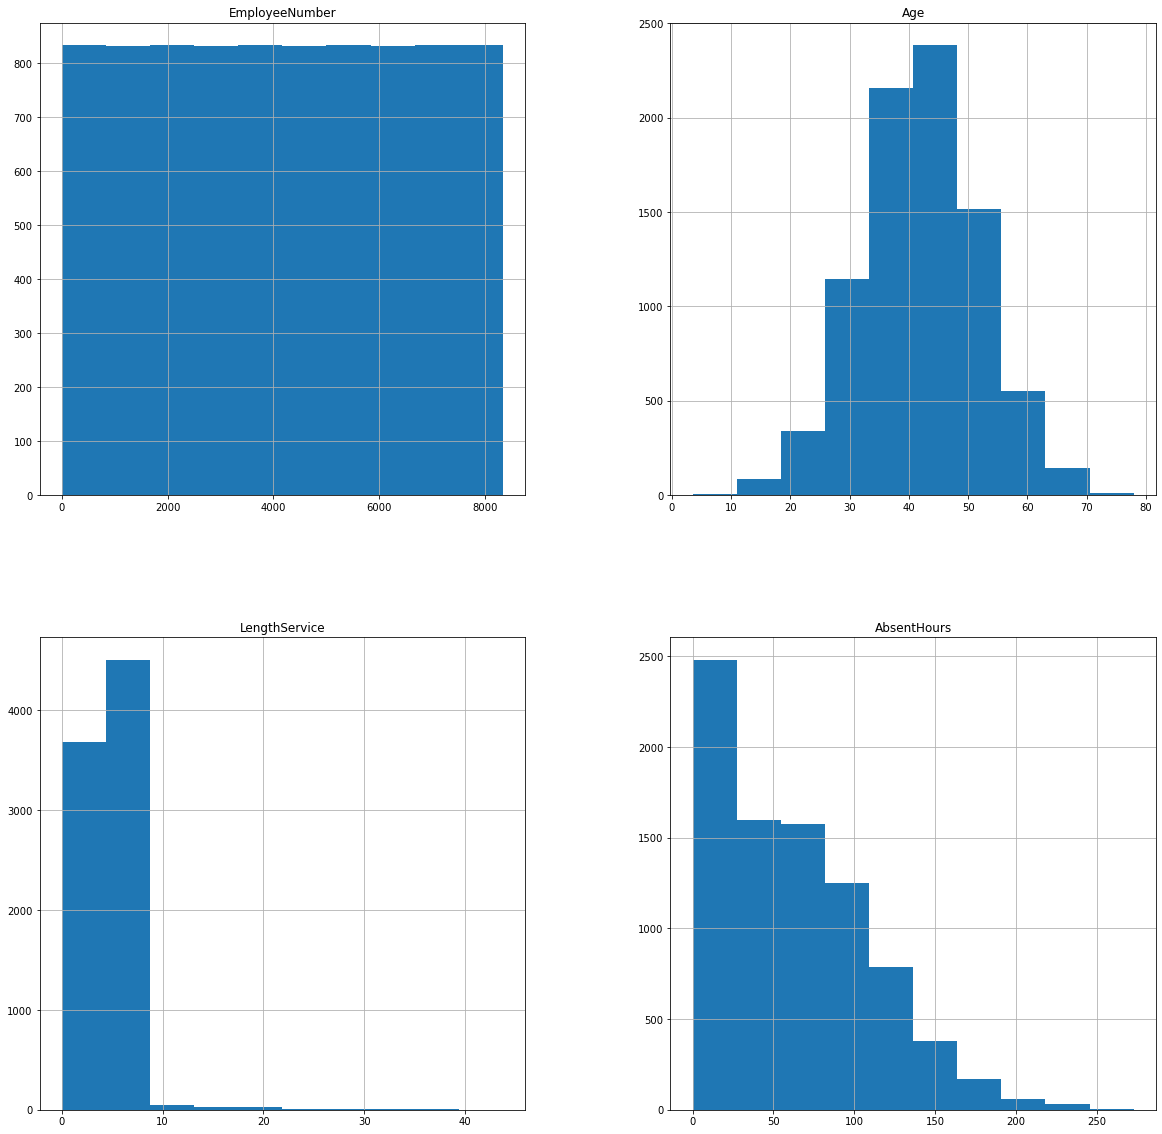

In [22]:
df.hist(figsize=(20,20))
plt.show()

Наиболее распространен возраст работников от 41 до 47 лет. Продолжительность службы - от 4 до 8 лет, а уровень абсентеизма - до 30 часов.

(array([1464., 1780., 1546., 1506.,    4.,   77.,    5.,   39.,    5.,
        1910.]),
 array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ]),
 <BarContainer object of 10 artists>)

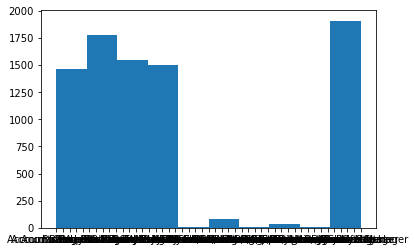

In [49]:
plt.hist(df['JobTitle'])

Сотрудники с некоторыми профессиями имеют большой отрыв по абсентеизму.

(array([4120.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4216.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

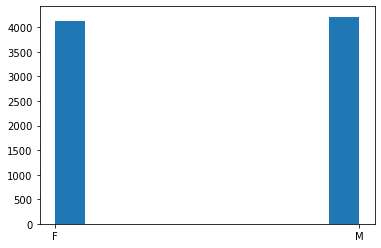

In [50]:
plt.hist(df['Gender'])

Мужчин незначительно больше женщин.

## Удаление аномальных значений

In [65]:
df['anomally_Age'] = np.where(
                            df['Age'] > 
                            np.mean(df.Age) + 3*np.std(df.Age),                 
                            1, 0)
df_anomally_Age = df[df['Age'] == 1]

df=df.drop(df_anomally_Age.index)

In [64]:
df['anomally_LengthService'] = np.where(
                            df['LengthService'] > 
                            np.mean(df.LengthService) + 3*np.std(df.LengthService),                 
                            1, 0)
df_anomally_LengthService = df[df['LengthService'] == 1]

df=df.drop(df_anomally_LengthService.index)

In [62]:
df['anomally_AbsentHours'] = np.where(
                            df['AbsentHours'] > 
                            np.mean(df.AbsentHours) + 3*np.std(df.AbsentHours),                 
                            1, 0)
df_anomally_AbsentHours = df[df['AbsentHours'] == 1]

df=df.drop(df_anomally_AbsentHours.index)

In [63]:
df['anomally_EmployeeNumber'] = np.where(
                            df['EmployeeNumber'] > 
                            np.mean(df.EmployeeNumber) + 3*np.std(df.EmployeeNumber),                 
                            1, 0)
df_anomally_EmployeeNumber = df[df['EmployeeNumber'] == 1]

df=df.drop(df_anomally_EmployeeNumber.index)

Перед выполнением аналитической обработки мы удалили аномальные значения, поскольку они могут вызвать некорректную работу алгоритмов и привести к искажению результатов анализа данных.

## Проведение train и test

In [114]:
df

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit,anomally_satisfaction_level,anomally_Age,anomally_LengthService,anomally_AbsentHours,anomally_EmployeeNumber
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores,0,0,0,0,0
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores,0,0,0,0,0
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores,0,0,0,0,0
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores,0,0,0,0,0
5,6,Jones,Ernie,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores,0,0,0,0,0
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores,0,0,0,0,0
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores,0,0,0,0,0
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores,0,0,0,0,0


In [101]:
X = df[['LengthService', 'Age']]

y = df[['AbsentHours']].values.ravel()

In [118]:
X['Gender'] = np.where(df["Gender"] == 'M', 0, 1)

<ipython-input-118-7f99f3c48675>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = np.where(df["Gender"] == 'M', 0, 1)


In [120]:
X

,LengthService,Age,Gender
1,5.532445,40.320902,0
2,4.389973,48.822047,0
3,3.081736,44.599357,1
4,3.619091,35.697876,0
5,2.717692,48.440311,0
...,...,...,...
8331,4.838288,46.057544,1
8332,2.427274,34.455490,0
8333,4.009393,58.347160,1
8334,6.154837,43.340616,1


In [121]:
y

array([ 30.16507231,  83.80779766,  70.02016505, ..., 176.3569396 ,
        60.3219172 , 112.0233888 ])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6654, 3)
(1664, 3)
(6654,)
(1664,)


In [124]:
Y_test

array([170.0396297 ,   0.        ,  81.65459515, ...,  97.17956536,
         0.        ,   0.        ])

## Обучение линейной регрессии

In [125]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [126]:
lin_model = LinearRegression()

In [127]:
lin_model.fit(X_train, Y_train)

LinearRegression()

In [139]:
names = ['LengthService', 'Age', 'Gender']

In [142]:
importance = lin_model.coef_
for i in range(len(names)):
    print(names[i], importance[i])

LengthService -1.8033918450061992
Age 4.161799353256304
Gender 16.854154616325303


In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [130]:
def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

## RMSE и R2

In [133]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 25.53960414745513
R2 score is 0.7283163876093441
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 25.91708762516392
R2 score is 0.7223316053710198


In [134]:
X_test

,LengthService,Age,Gender
5297,2.971644,58.275661,1
743,3.849750,32.830994,1
7561,5.556229,49.920768,0
3152,2.199341,22.321566,0
2330,3.823164,33.721600,1
...,...,...,...
5943,5.496668,41.476462,1
7715,4.890726,48.951895,1
7096,6.339762,48.475598,0
2401,4.305448,26.558683,0


In [144]:
lin_model.predict([[4,48,1]])

array([96.15891673])

R2 оказался выше 0.72. Когда коэффициент близок к 1, то условная дисперсия модели достаточно мала и весьма вероятно, что модель неплохо описывает данные. 

## Выводы

1. Модель хорошо опятывает данные, поскольку R2 близок к 1.
2. Наиболее весомым признаком является Gender.
3. Наименее весомым признаком является salary LengthService.